In [1]:
%matplotlib inline
from fastai.basics import *
import torch 

In [ ]:
 #pip install fastai

In this part of the lecture we explain Stochastic Gradient Descent (SGD) which is an **optimization** method commonly used in neural networks. We will illustrate the concepts with concrete examples.

#  Linear Regression with Stochastic Gradient Descent

## Problem Setup

The goal of linear regression is to fit a line to a set of points.

#### Let's generate univariate data from Uniform Distribution between -30 and 30.

In [2]:
data_size = 100
x = torch.ones(data_size,2) 
x[:,0].uniform_(-30.,30)
x[:5]

tensor([[ 28.5549,   1.0000],
        [ 20.2720,   1.0000],
        [ -1.6385,   1.0000],
        [ 27.9752,   1.0000],
        [-12.3541,   1.0000]])

In [3]:
a = tensor(3.,2); print(a.shape)
print(a)

torch.Size([2])
tensor([3., 2.])


### How many parameters does this linear regression model have?

In [4]:

y_generator = lambda x,a,data_size,alpha : x@a + alpha*torch.rand(data_size)
#y = x@a + torch.rand(n)
y = y_generator(x,a,data_size,0)
print (y)

tensor([ 87.6646,  62.8160,  -2.9155,  85.9257, -35.0624,  80.4089,  67.6767,
         44.1940, -50.6535, -87.5809,  17.1754, -62.9698, -75.4954,  15.3901,
         54.3808,  56.1154,  24.9521, -46.6549,  78.5983, -79.1051, -36.5590,
         86.3410, -70.9577,   2.8789, -76.4618, -25.2242, -39.1012, -48.2903,
        -28.0283, -67.0683,  85.2607, -58.8556,  28.0389,  31.9125,  56.5747,
         57.7207, -43.9352,  34.5252,  32.3016, -80.1674,  54.2649,  76.1626,
        -33.8579, -50.2650,   0.6818,  17.7042,  45.7841,  -2.1564, -56.2324,
         77.7864,  39.2803, -75.3166,  34.7958,  32.8659, -18.9641,  86.4801,
         35.6950, -23.4776,  14.1377, -45.2387,  90.2824,  57.2697, -16.8922,
         10.4731,  68.5420,  26.5650, -62.1077,  14.8574,  76.7572, -69.3308,
        -84.8380,  74.7867, -40.9936,  86.0550,  43.9382,  51.2552, -41.1016,
         18.6880,  65.0194,  34.3813,  51.8964, -59.2095, -19.6079,  29.4828,
        -34.1195,   3.1933, -68.1306, -51.2534,  19.1809, -54.72

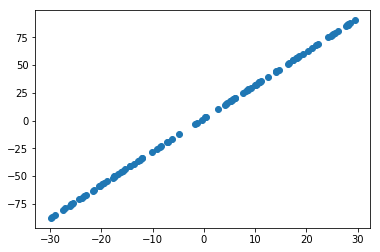

In [5]:
plt.scatter(x[:,0], y);

You want to find **parameters** (weights) `a` such that you minimize the *error* between the points and the line `x@a`. Note that here `a` is unknown. For a regression problem the most common *error function* or *loss function* is the **mean squared error**. 

In [6]:
def mse(y_hat, y): return ((y_hat-y)**2).mean()

Suppose we believe `a = (3.0,2.0)` then we can compute `y_hat` which is our *prediction* and then compute our error.

In [7]:
a = tensor(3.,2)
print (a)

tensor([3., 2.])


In [9]:
simple_linear_regression = lambda x,a : x@a
y_hat = simple_linear_regression(x,a)
#y_hat = x@a
print(mse(y_hat, y))

tensor(0.)


Or maybe we wanted to generate some data that has random noise on a higher scale, with very high variance (noise variance)

In [10]:
y = y_generator(x,a,data_size,30)

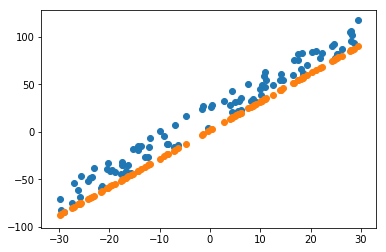

In [11]:
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],y_hat);

So far we have specified the *model* (linear regression) and the *evaluation criteria* (or *loss function*). Now we need to handle *optimization*; that is, how do we find the best values for `a`? How do we find the best *fitting* linear regression.

# From Gradient to Stochastic Gradient Descent

We would like to find the values of `a` that minimize `mse_loss`.

**Gradient descent** is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved by taking steps in the negative direction of the function gradient.

Here is gradient descent implemented in [PyTorch](http://pytorch.org/).

### Putting Everything TOgether :  Training SImple Linear Regression with List Comprehension

In [12]:
import numpy
batch_size = 5

a = nn.Parameter(tensor(-1.,1))
losses = []

data_size=100
x = torch.ones(data_size,2) 
x[:,0].uniform_(-30.,30)


y_generator = lambda x,a,data_size,alpha : x@a + alpha*torch.rand(data_size)
#y = x@a + torch.rand(n)
y = y_generator(x,a,data_size,5)

def mse(y_hat, y): return ((y_hat-y)**2).mean()
print(f"Data size is {data_size} and batch size is {batch_size}")

parameters = a

def update(parameters,batch_size,data_size,t):
    indices = numpy.random.randint(1, data_size, size=(batch_size,1)).flatten()
    y_hat = x[indices,:]@parameters
    loss = mse(y[indices], y_hat)
    if t % 10 == 0: print(loss)
    loss.backward(retain_graph=True)
    with torch.no_grad():
        parameters.sub_(lr * parameters.grad)
        parameters.grad.zero_()
    losses.append(loss)

lr = 1e-2
iterations_per_epoch = data_size//batch_size
epochs = 10
total_iterations = iterations_per_epoch * epochs
print(f"Total iterations is {total_iterations}")

#### USING LIST COMPREHENSION ####
[update(parameters,batch_size,data_size,t) for t in range(total_iterations)]

amnt_losses_recorded = total_iterations//10
print(f"Since every 10th iteration result is printed, in total we have {amnt_losses_recorded} print statements")


Data size is 100 and batch size is 5
Total iterations is 200
tensor(6.6195, grad_fn=<MeanBackward0>)
tensor(8.5311, grad_fn=<MeanBackward0>)
tensor(3.5584, grad_fn=<MeanBackward0>)
tensor(8.6282, grad_fn=<MeanBackward0>)
tensor(12.3637, grad_fn=<MeanBackward0>)
tensor(11.5437, grad_fn=<MeanBackward0>)
tensor(9.4818, grad_fn=<MeanBackward0>)
tensor(4.0878, grad_fn=<MeanBackward0>)
tensor(3.1993, grad_fn=<MeanBackward0>)
tensor(6.3422, grad_fn=<MeanBackward0>)
tensor(10.1886, grad_fn=<MeanBackward0>)
tensor(7.3822, grad_fn=<MeanBackward0>)
tensor(6.7881, grad_fn=<MeanBackward0>)
tensor(4.1956, grad_fn=<MeanBackward0>)
tensor(9.0075, grad_fn=<MeanBackward0>)
tensor(13.4572, grad_fn=<MeanBackward0>)
tensor(7.2261, grad_fn=<MeanBackward0>)
tensor(6.2560, grad_fn=<MeanBackward0>)
tensor(6.4309, grad_fn=<MeanBackward0>)
tensor(7.8538, grad_fn=<MeanBackward0>)
Since every 10th iteration result is printed, in total we have 20 print statements


In [13]:
print(f"The losses look like this {losses[0:10]}")

The losses look like this [tensor(6.6195, grad_fn=<MeanBackward0>), tensor(6.3456, grad_fn=<MeanBackward0>), tensor(7.8264, grad_fn=<MeanBackward0>), tensor(5.8438, grad_fn=<MeanBackward0>), tensor(8.0367, grad_fn=<MeanBackward0>), tensor(4.0467, grad_fn=<MeanBackward0>), tensor(6.9225, grad_fn=<MeanBackward0>), tensor(7.7517, grad_fn=<MeanBackward0>), tensor(9.9712, grad_fn=<MeanBackward0>), tensor(10.8407, grad_fn=<MeanBackward0>)]


## Interlude : Using Iterators to Improve Code Readability. Connection Between Functional and Object Oriented Programming

[Read](https://medium.com/python-pandemonium/never-write-for-loops-again-91a5a4c84baf)
[And this](https://opensource.com/article/18/3/loop-better-deeper-look-iteration-python)

In [16]:
from itertools import count
class square_all:
    def __init__(self, numbers):
        self.numbers = iter(numbers)
    def __next__(self):
        return next(self.numbers) ** 2
    def __iter__(self):
        return self
    
numbers = count(5)
print(f"The numbers are {type(numbers)}")
squares = square_all(numbers)
print(f"The type of squares is are {type(squares)}")

print(next(squares))
print(next(squares))


The numbers are <class 'itertools.count'>
The type of squares is are <class '__main__.square_all'>
25
36


**This iterator class works, but we don't usually make iterators this way.
Usually when we want to make a custom iterator, we make a generator function:**


In [17]:
# This generator function is equivalent to the class we made above, and it works essentially the same way.
def square_all(numbers):
    for n in numbers:
        yield n**2
        
# OR

def square_all(numbers):
    return (n**2 for n in numbers)

That yield statement probably seems magical, but it is very powerful: 

**`yield` allows us to put our generator function on pause between calls from the next function. 
The yield statement is the thing that separates generator functions from regular functions.**

### Mixing Generators and Iterables into the Learning Process


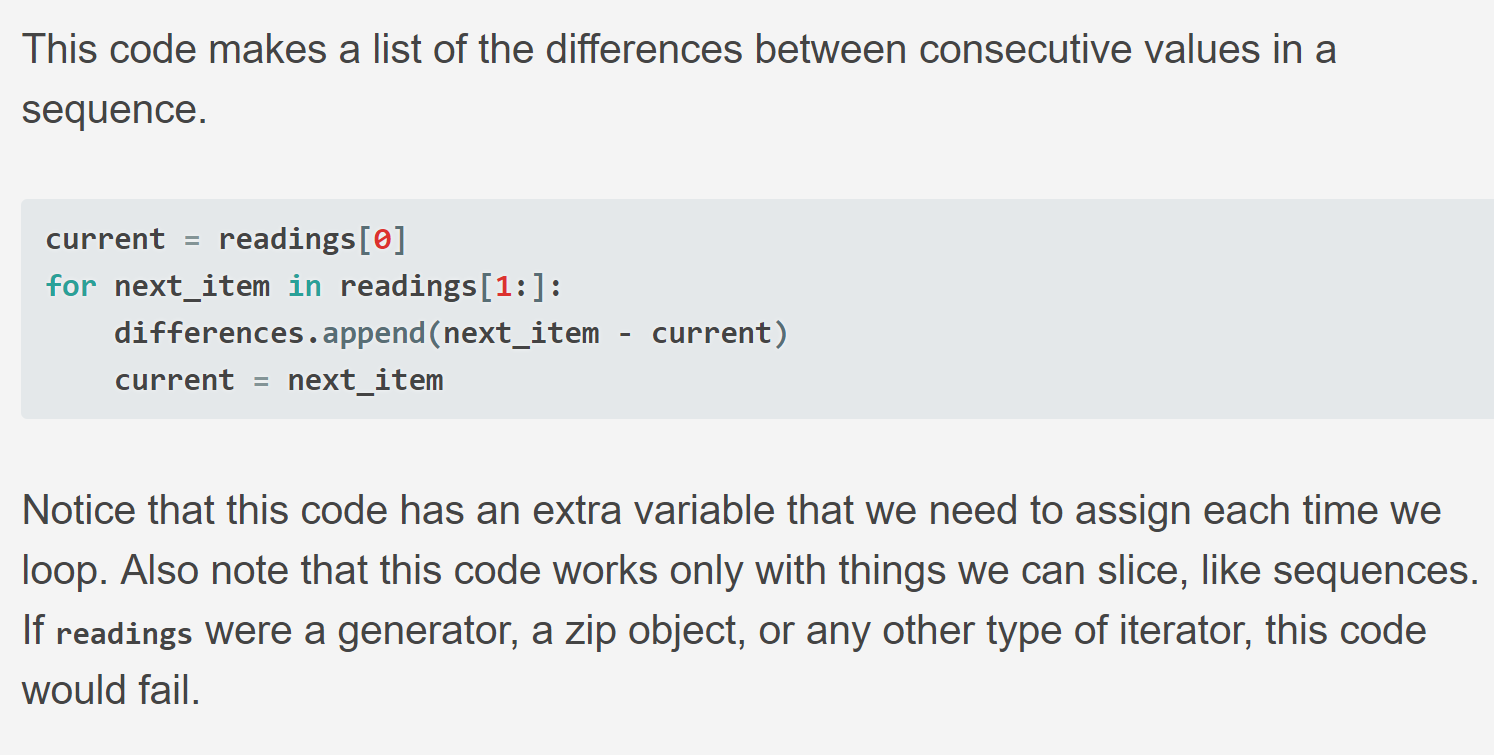

In [18]:
from IPython.display import Image

Image("https://filedn.com/lK1VhM9GbBxVlERr9KFjD4B/img/initial_version.PNG")

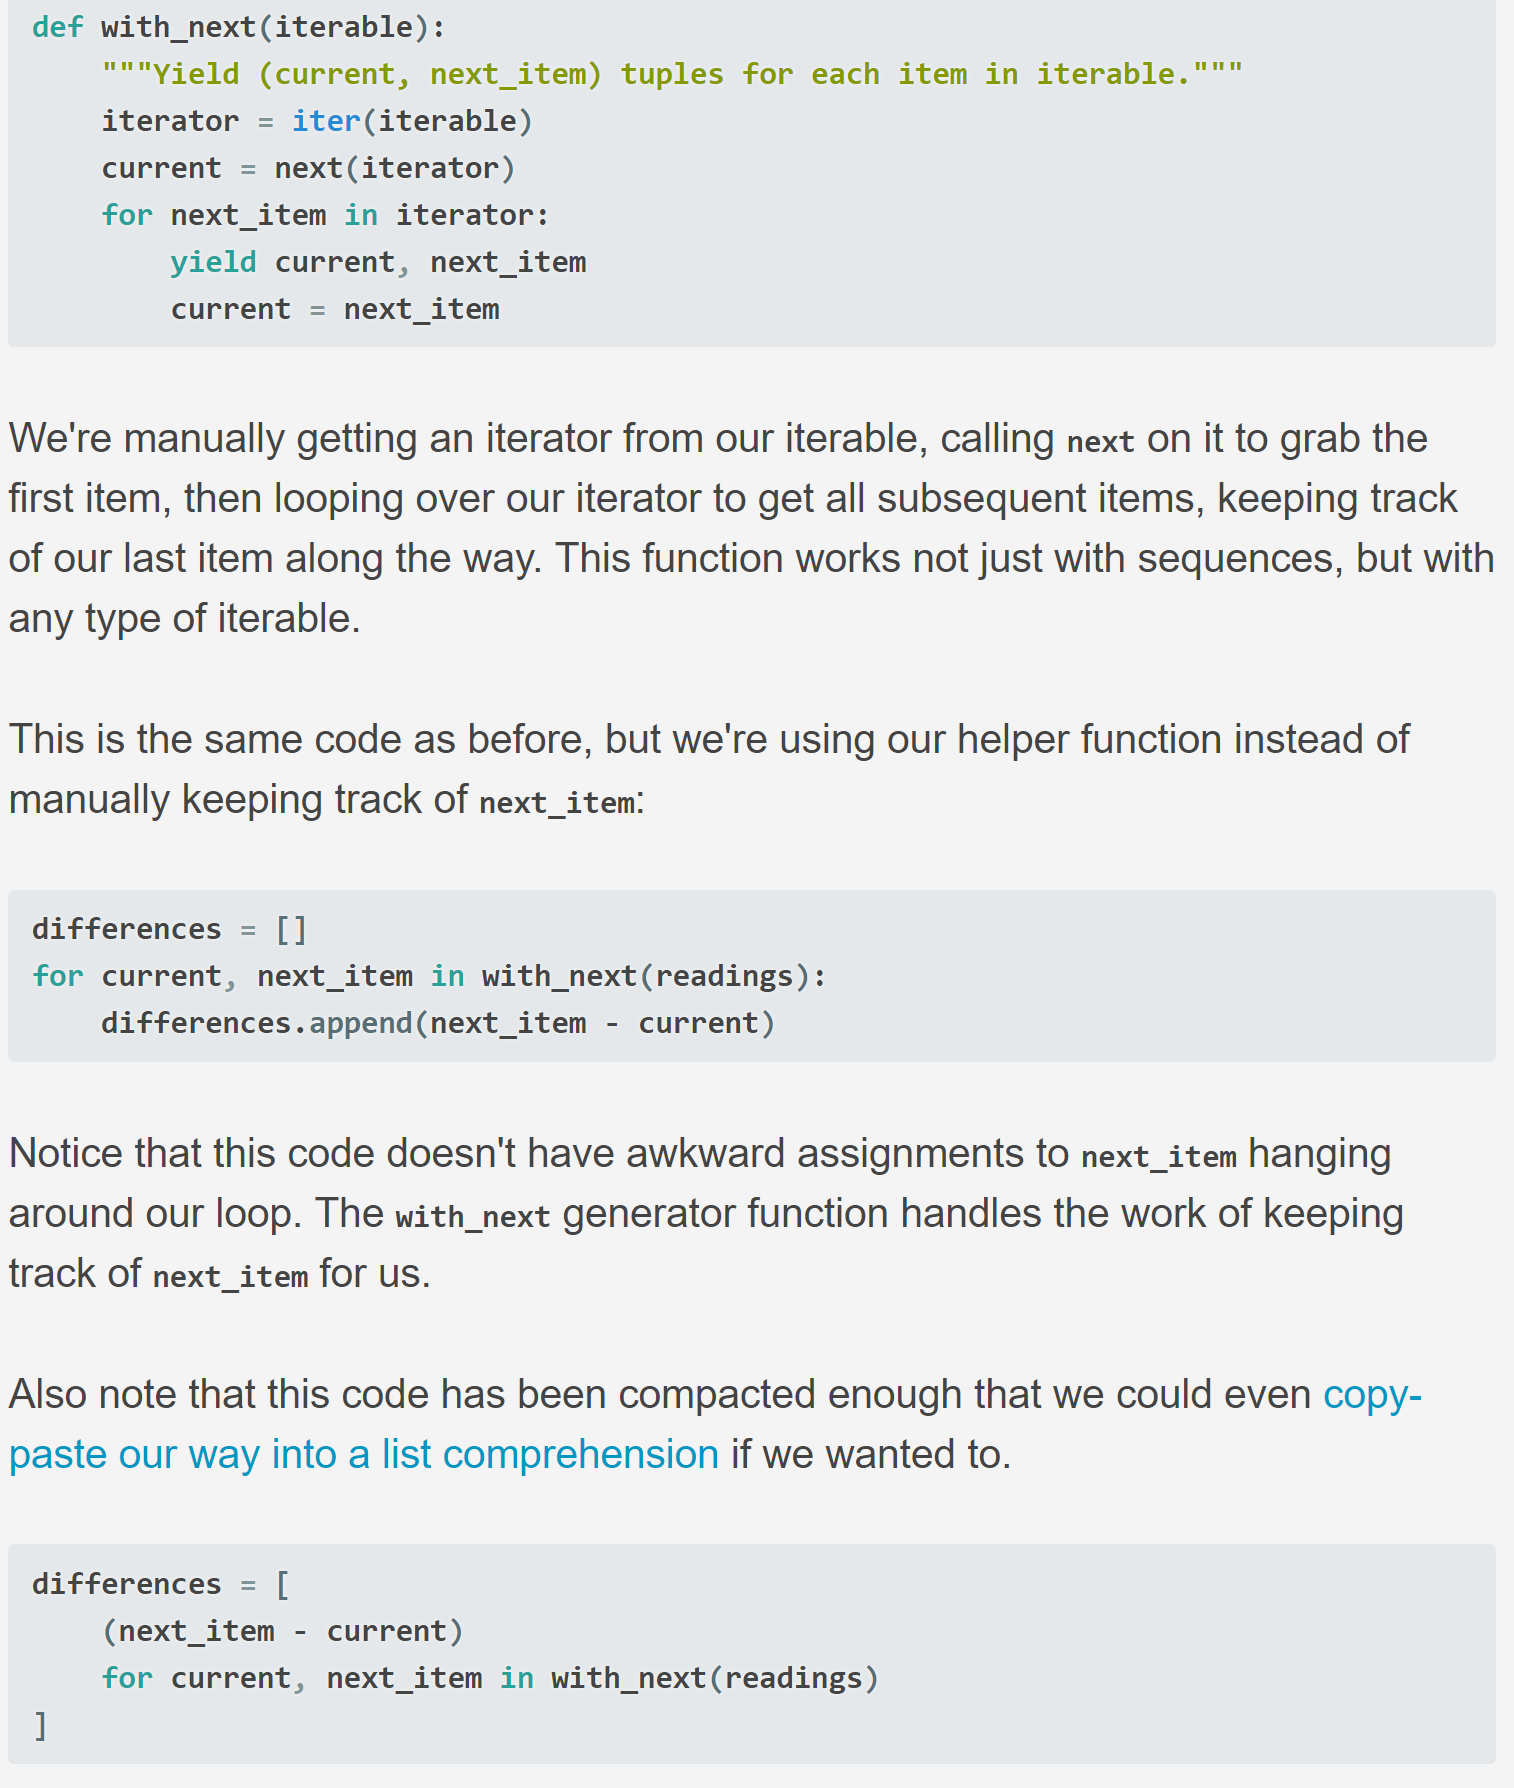

In [19]:
Image("https://filedn.com/lK1VhM9GbBxVlERr9KFjD4B/img/improve_code_2.PNG")

## Using Generators to Find The Differences in Errors (Gradient of Errors)

Say you want to expand your skills and not use Tensorboard to visualize the training procedure. 
Minitask :

- **Write a generator function that yields 2 subsequent values over the iterable at a time.**
- **Then use this function to get the gradient of the loss errors and visualize these errors using Matplotlib**

Text(0.5, 1.0, 'Linear REgression Problem with the Learned Regression Line')

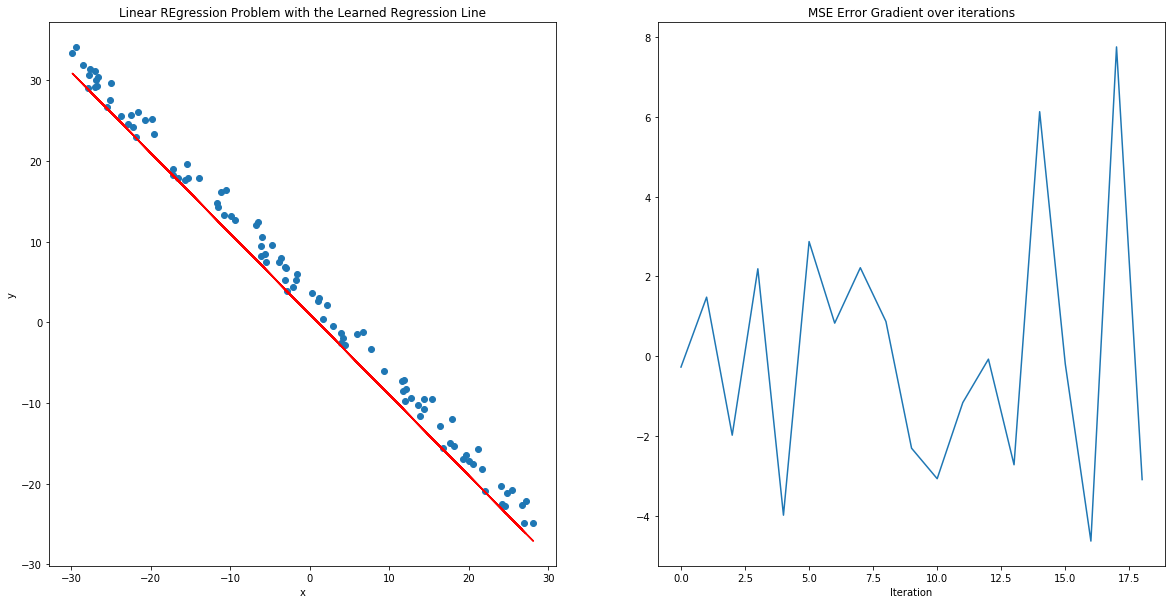

In [20]:
import matplotlib.pyplot as plt

def testing_subtraction(tensor1,tensor2):
    try:
        diff = tensor1.data - tensor2.data
        #print(f"The difference of {tensor1.data} and {tensor2.data} is {diff}")
    except:
        diff = 999
        print("Subtraction failed")
        
    return diff
def with_next(iterable):
    """Yield (current, next_item) tuples for each item in iterable."""
    iterator = iter(iterable)
    current = next(iterator)
    for next_item in iterator:
        yield current, next_item
        current = next_item

differences = []
for current, next_item in with_next(range(amnt_losses_recorded)):
    differences.append(testing_subtraction(losses[next_item],losses[current]))



fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 10))
ax2.plot(differences)
ax2.set_title("MSE Error Gradient over iterations")
ax2.set_xlabel('Iteration')
ax1.scatter(x[:,0],y)
ax1.plot(x[:,0],x@a,'r');
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Linear REgression Problem with the Learned Regression Line')

### What can you say about the convergence of Stochastic Gradient Descent when looking at this plot?

## Animate it!


[Run the animation on the FastAI Tutorial](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-sgd.ipynb)

In practice, we don't calculate on the whole file at once, but we use *mini-batches*.

## Vocabulary

**- Learning rate :** <br>

The amount that the weights are updated during training is referred to as the step size or the “learning rate.” Specifically, the learning rate is a configurable hyperparameter used in the training of neural networks that has a small positive value, often in the range between 0.0 and 1.0.

**- Epoch :** <br>

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.


**- Minibatch :** <br>

The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.( **In short** The Batch size is a term used in machine learning and refers to the number of training examples utilised in one iteration) where as **Minibatch**:- When the batch size is more than one sample and less than the size of the training dataset, the learning algorithm is called mini-batch gradient descent.  

**- SGD:**<br>

Stochastic Gradient Descent is an optimization technique in which a few samples arfe selected randomly instead of the whole dataset for each iteration 

**- Model / Architecture :**<br>
Basically a Model is a hypothesis, which we develpoed/designed it, to predict a value given a set of input values

**- Parameters :**<br>

simply it is a given set of data values 

**- Loss function :** <br>
 A Loss Functions tells us “how good” our model is at making predictions for a given set of parameters. The cost function has its own curve and its own gradients. The slope of this curve tells us how to update our parameters to make the model more accurate.
 **In short**, a loss function is used to determine how far the predicted values deviate from the actual values in the training data.

For classification problems, we use *cross entropy loss*, also known as *negative log likelihood loss*. This penalizes incorrect confident predictions, and correct unconfident predictions.